In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

#定義LeNet模型

In [9]:
def LeNet(input_shape=(28, 28, 1), num_classes=10):
    model = models.Sequential()
    model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(16, (5, 5), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(84, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

#創建和編譯模型

In [13]:
model = LeNet()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#加載MNIST數據

In [10]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

#預處理數據

In [11]:
# 將數據展平
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# 使用Scikit-learn進行數據標準化
scaler = StandardScaler()
train_images = scaler.fit_transform(train_images)
test_images = scaler.transform(test_images)

#數據重新塑型為CNN所需的形狀

In [12]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

#訓練模型

Epoch 1/10
938/938 [==============================] - 31s 32ms/step - loss: 0.2279 - accuracy: 0.9301 - val_loss: 0.0737 - val_accuracy: 0.9774
Epoch 2/10
938/938 [==============================] - 24s 26ms/step - loss: 0.0702 - accuracy: 0.9778 - val_loss: 0.0548 - val_accuracy: 0.9846
Epoch 3/10
938/938 [==============================] - 25s 27ms/step - loss: 0.0489 - accuracy: 0.9844 - val_loss: 0.0484 - val_accuracy: 0.9848
Epoch 4/10
938/938 [==============================] - 23s 25ms/step - loss: 0.0383 - accuracy: 0.9877 - val_loss: 0.0431 - val_accuracy: 0.9871
Epoch 5/10
938/938 [==============================] - 25s 27ms/step - loss: 0.0316 - accuracy: 0.9895 - val_loss: 0.0392 - val_accuracy: 0.9877
Epoch 6/10
938/938 [==============================] - 25s 26ms/step - loss: 0.0267 - accuracy: 0.9911 - val_loss: 0.0442 - val_accuracy: 0.9881
Epoch 7/10
938/938 [==============================] - 24s 26ms/step - loss: 0.0236 - accuracy: 0.9925 - val_loss: 0.0539 - val_accuracy:

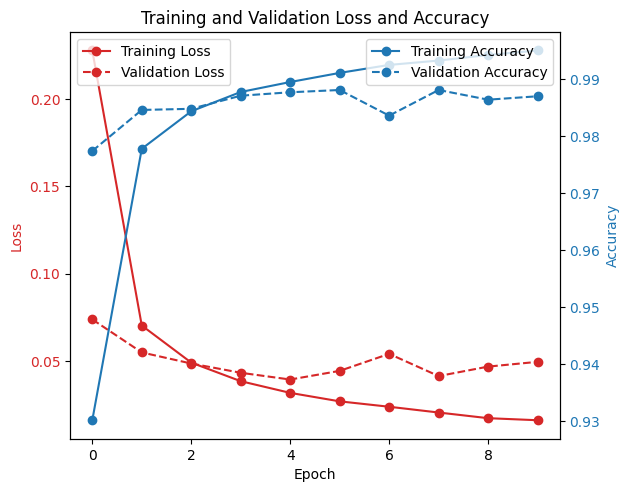

In [14]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

# 可視化損失和準確率
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color=color)
ax1.plot(history.history['loss'], marker='o', color=color, label='Training Loss')
ax1.plot(history.history['val_loss'], marker='o', linestyle='dashed', color=color, label='Validation Loss')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)  # we already handled the x-label with ax1
ax2.plot(history.history['accuracy'], marker='o', color=color, label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], marker='o', linestyle='dashed', color=color, label='Validation Accuracy')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Training and Validation Loss and Accuracy')
plt.show()

#評估模型

313/313 - 1s - loss: 0.0494 - accuracy: 0.9870 - 1s/epoch - 5ms/step
Test accuracy: 0.9869999885559082
313/313 [==============================] - 2s 5ms/step
Scikit-learn accuracy: 0.987


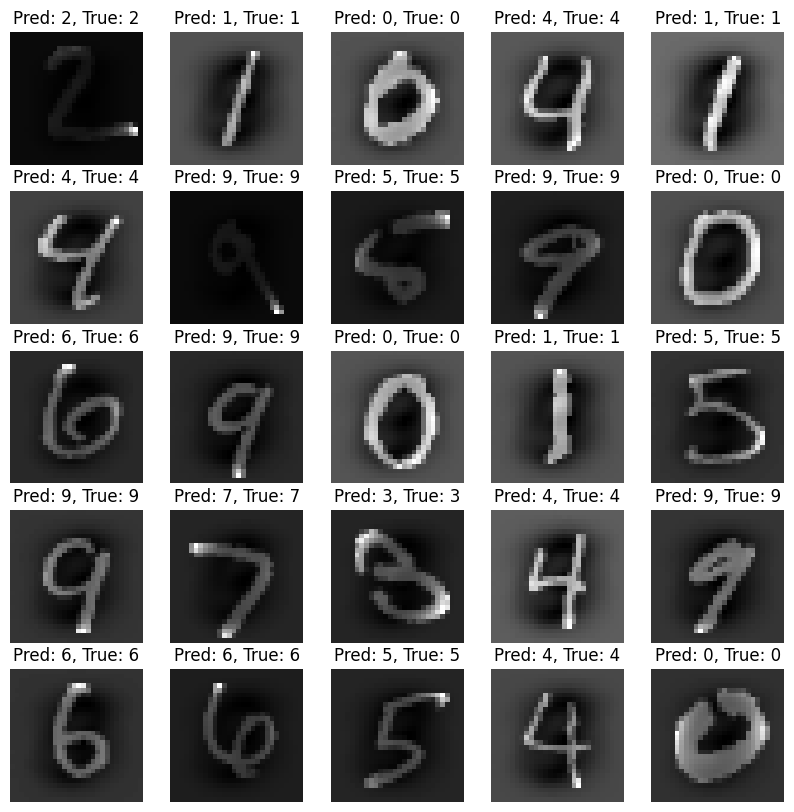

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

# 使用Scikit-learn進行模型評估
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions, axis=1)
accuracy = accuracy_score(test_labels, pred_labels)
print(f'Scikit-learn accuracy: {accuracy}')

# 可視化一些預測結果
fig = plt.figure(figsize=(10, 10))
for i in range(1, 26):
    ax = fig.add_subplot(5, 5, i)
    ax.imshow(test_images[i].reshape(28, 28), cmap='gray')
    pred_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    ax.title.set_text(f'Pred: {pred_label}, True: {true_label}')
    ax.axis('off')
plt.show()